
# Community Detection using Girvan-Newman

This example shows the detection of communities in the Zachary Karate
Club dataset using the Girvan-Newman method.

We plot the change in modularity as important edges are removed.
Graph is coloured and plotted based on community detection when number
of iterations are 1 and 4 respectively.


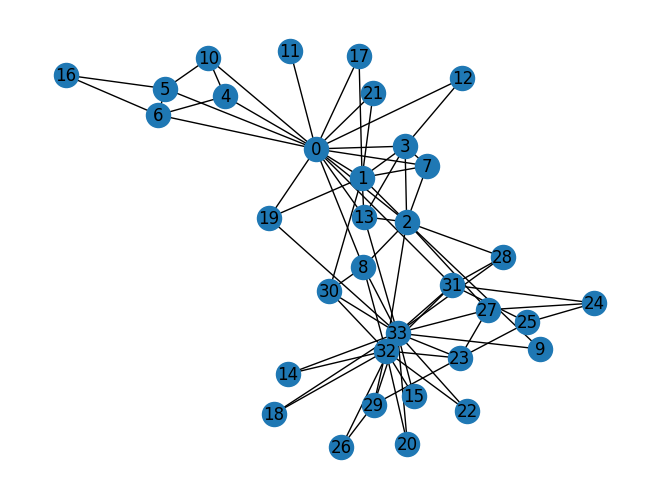

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load karate graph and find communities using Girvan-Newman
G = nx.karate_club_graph()

# Vẽ đồ thị
nx.draw(G, with_labels=True)
plt.show()

# Phát hiện cộng đồng bằng Girvan-Newman
communities = list(nx.community.girvan_newman(G))



Số lượng cộng đồng:  [({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), ({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9}), ({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11}), ({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26}), ({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26}), ({0, 1, 3, 7

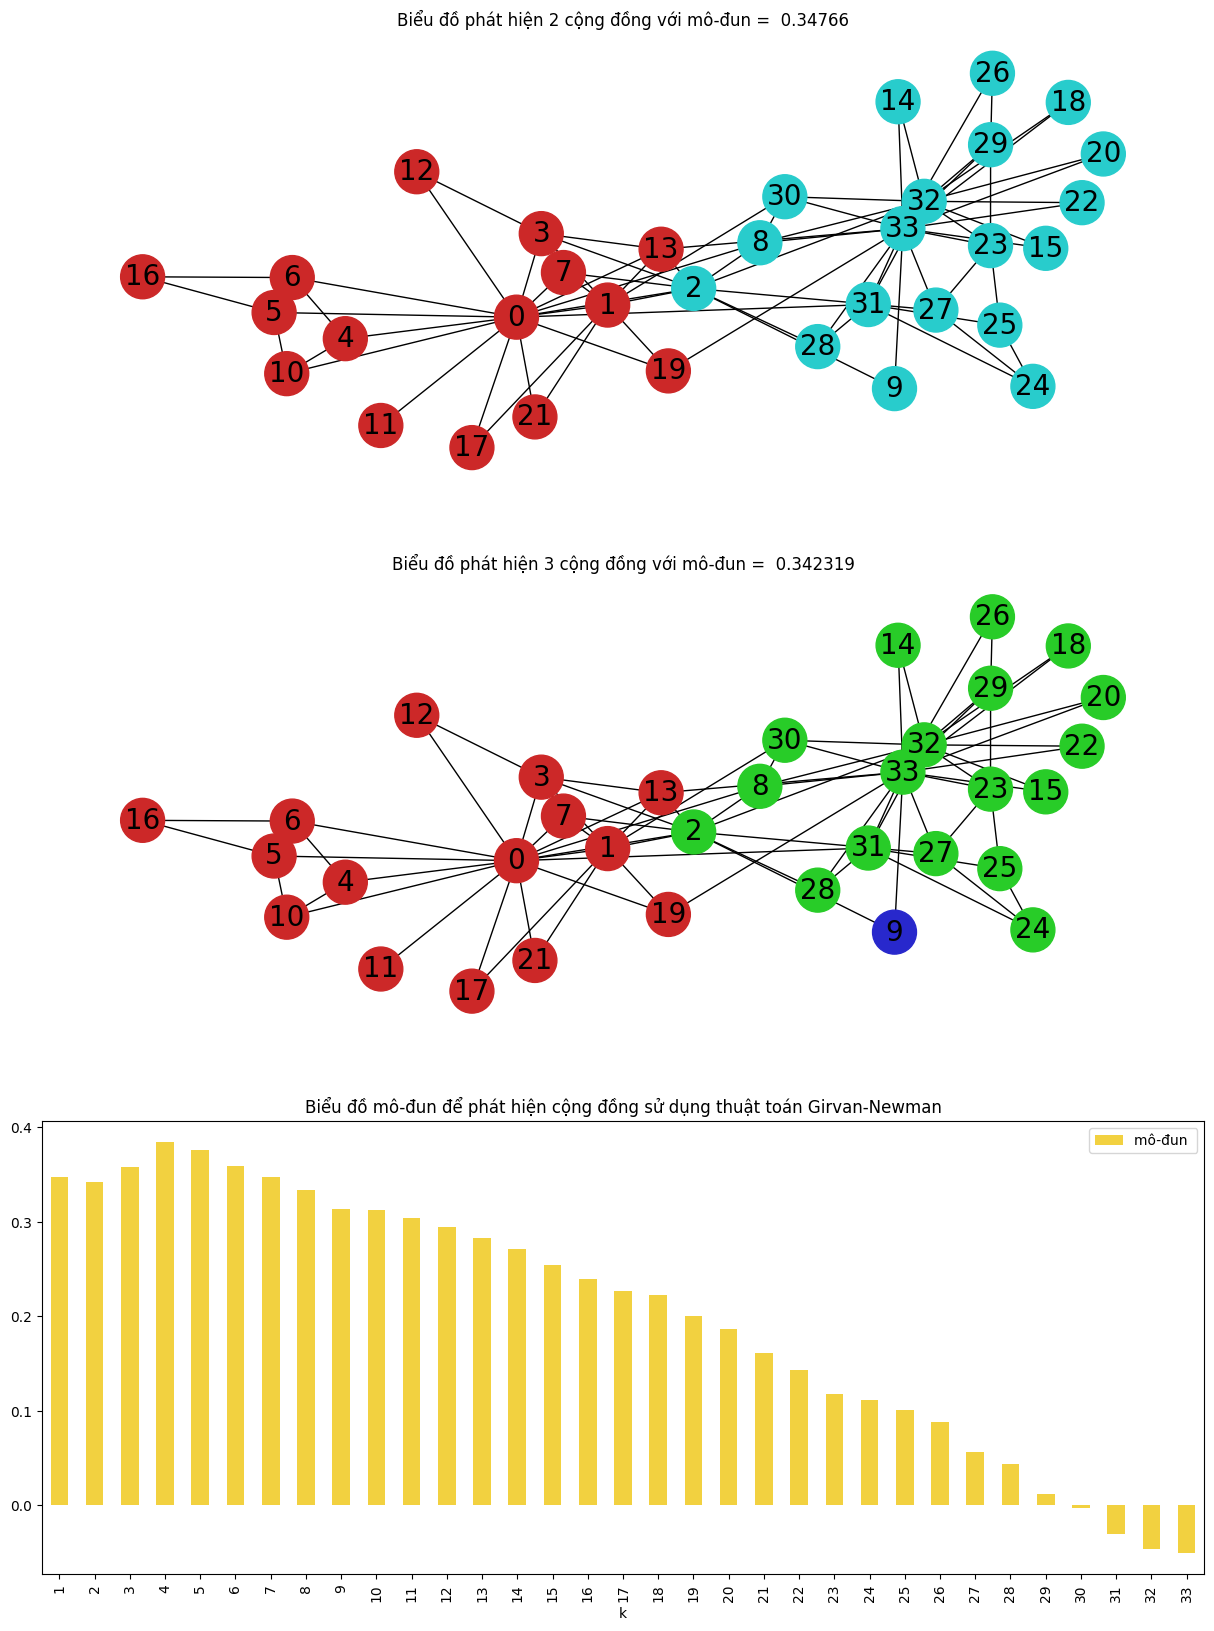

In [5]:
# Modularity -> đo lường việc chia mạng thành các mô-đun
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "mô-đun "],
)

import colorsys

def generate_colors(num_colors):
    colors = []
    for i in range(num_colors):
        hue = i / num_colors
        rgb = colorsys.hsv_to_rgb(hue, 0.8, 0.8)
        colors.append('#%02x%02x%02x' % tuple(int(x * 255) for x in rgb))
    return colors

num_communities = len(communities)
colors = generate_colors(num_communities)

# hàm tạo danh sách màu cho nút
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities)
    colors = generate_colors(number_of_colors)
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# hàm vẽ biểu đồ với màu nút dựa trên các cộng đồng
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Biểu đồ phát hiện {len(communities)} cộng đồng với mô-đun =  {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


fig, ax = plt.subplots(3, figsize=(15, 20))
print("Số lượng cộng đồng: ",communities)
# Vẽ biểu đồ với màu dựa trên các cộng đồng
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[1], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Biểu đồ mô-đun để phát hiện cộng đồng sử dụng thuật toán Girvan-Newman",
)
plt.show()
